In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
from tensorflow.keras import layers

In [26]:
import os
import random
import shutil

source_folder = r'animals10\raw-img'
destination_folder = 'raw-img_with_subfolders'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get a list of all subfolders in the source folder
subfolders = [f.path for f in os.scandir(source_folder) if f.is_dir()]

# Iterate over each subfolder
for subfolder in subfolders:
    # Get a list of all image files in the subfolder
    image_files = [f.path for f in os.scandir(subfolder) if f.is_file() and f.name.endswith(('.jpg', '.jpeg', '.png'))]

    # Choose 10 random images from the subfolder
    random_images = random.sample(image_files, min(10, len(image_files)))

    # Get the name of the subfolder
    subfolder_name = os.path.basename(subfolder)

    # Create a new folder in the destination folder with the subfolder name
    destination_subfolder = os.path.join(destination_folder, subfolder_name)
    os.makedirs(destination_subfolder, exist_ok=True)

    # Copy the random images to the destination subfolder
    for image_file in random_images:
        shutil.copy2(image_file, destination_subfolder)


In [2]:
data = r"animals10\raw-img"
class_names = sorted(os.listdir(data))
class_names
for name in class_names:
    print(name,len(os.listdir(data+ "/" +name)))

butterfly 2112
cat 1668
chicken 3098
cow 1866
dog 4863
elephant 1446
horse 2623
sheep 1820
spider 4821
squirrel 1862


In [3]:
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              validation_split=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,
                              zoom_range=0.05,
                              rotation_range=25)

In [4]:
train_data = generator.flow_from_directory( data,
                                            batch_size=32, 
                                            target_size=(224, 224), 
                                            class_mode="categorical", 
                                            shuffle=True, 
                                            subset='training',
                                            seed=42)

test_data = generator.flow_from_directory( data,
                                           batch_size=32,
                                           target_size=(224, 224),
                                           class_mode="categorical",
                                           shuffle=True,
                                           subset='validation',
                                           seed=42)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [28]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Layer, Flatten
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

base_model = VGG16(include_top = False,
                   weights = 'imagenet',
                   input_shape = (224,224,3))
base_model.trainable = False
last = base_model.layers[-2].output
x = GlobalAveragePooling2D()(last)
x = Dense(512,'relu')(x)
x = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=x)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
model.summary() 


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [88]:
print(tf.test.gpu_device_name())



/device:GPU:0


In [1]:
import tensorflow as tf 
print(tf.__version__)

print('1: ', tf.config.list_physical_devices('GPU'))
print('2: ', tf.test.is_built_with_cuda)
print('3: ', tf.test.gpu_device_name())
print('4: ', tf.config.get_visible_devices())


2.10.0
1:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2:  <function is_built_with_cuda at 0x000001D55EE5F0A0>
3:  /device:GPU:0
4:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [29]:


history = model.fit(train_data,
                    epochs=3,
                    validation_data=test_data)

Epoch 1/3
655/655 [==============================] - 3440s 5s/step - loss: 1.2424 - accuracy: 0.5839 - val_loss: 0.9736 - val_accuracy: 0.6787
Epoch 2/3
655/655 [==============================] - 3378s 5s/step - loss: 0.9059 - accuracy: 0.6960 - val_loss: 0.9225 - val_accuracy: 0.6833
Epoch 3/3
655/655 [==============================] - 3375s 5s/step - loss: 0.8204 - accuracy: 0.7212 - val_loss: 0.8147 - val_accuracy: 0.7234


In [30]:
model_test = history.model

In [31]:
type(model_test)
model_test.save('VGG16_transfer_learning_animals10.h5')


In [32]:
import keras
loaded_model = keras.models.load_model('VGG16_transfer_learning_animals10.h5')

In [33]:
loaded_model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

Step 400


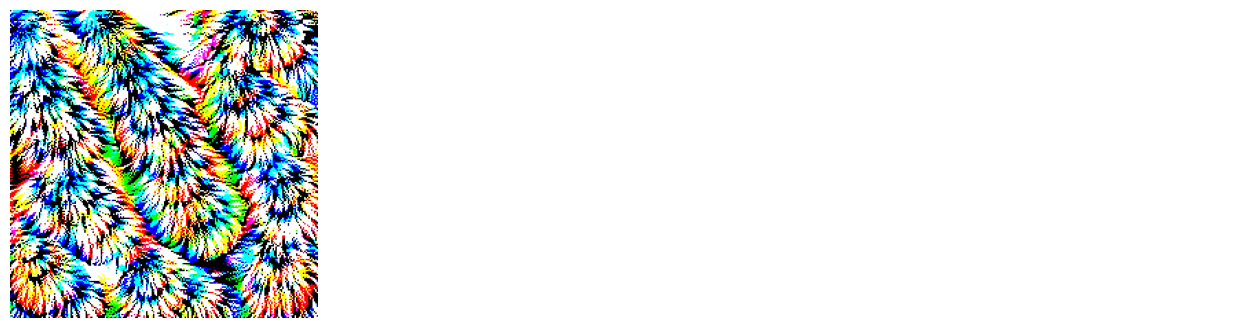

In [40]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from mini_lucid_tf2 import objectives, transformations, render


obj = objectives.Channel(loaded_model, 'block4_pool',1)
print(obj)
_ = render.render_vis(obj, 224,steps=(400,))

Step 200


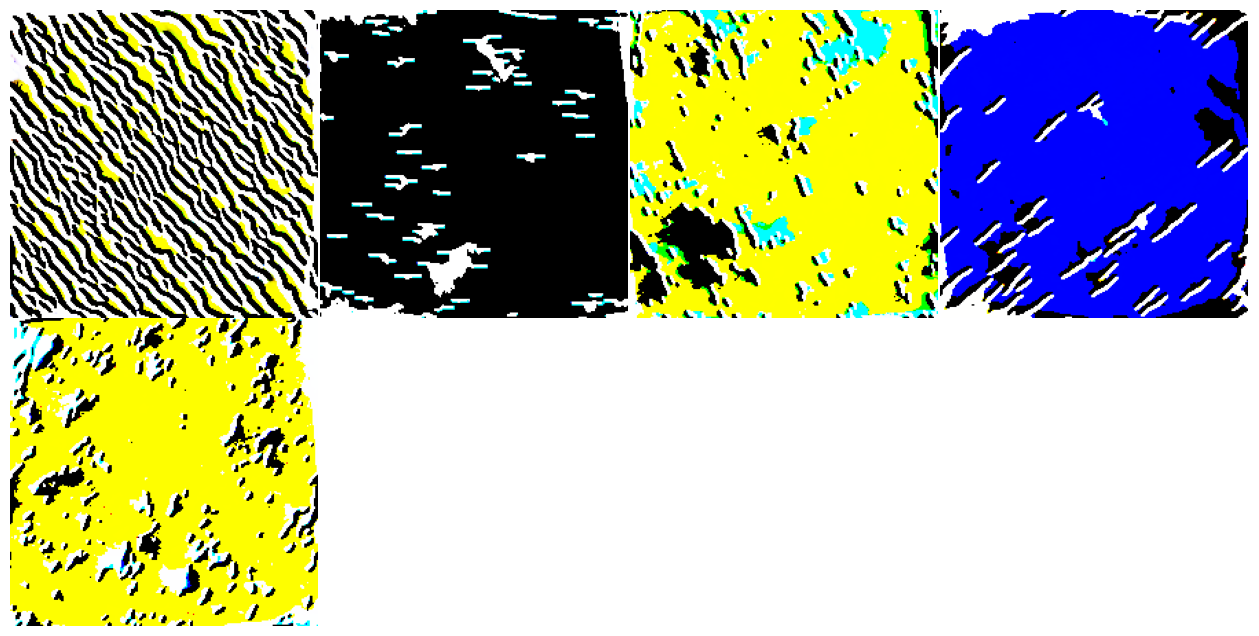

In [24]:
obj = objectives.Channels(loaded_model, 'block1_conv1',[42,43,44,21,55])
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

In [25]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from mini_lucid_tf2 import objectives, transformations, render


obj = objectives.GramCosSim(loaded_model, 'dense')
print(obj)
_ = render.render_vis(obj, 224,steps=(20,))

InvalidArgumentError: {{function_node __wrapped__Einsum_N_2_device_/job:localhost/replica:0/task:0/device:GPU:0}} Expected input 0 to have rank 4 but got: 2 [Op:Einsum]

In [49]:
classes_dictionary = train_data.class_indices

In [22]:
feature_extractor_layer = hub.KerasLayer(efficientnet_url,
                                           trainable=False, 
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))

efficientnet_model = tf.keras.Sequential([
    feature_extractor_layer, 
    layers.Dense(10, activation='softmax', name='output_layer')  
  ])

In [23]:
efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [25]:
efficientnet_model_history = efficientnet_model.fit(train_data, 
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/10
655/655 [==============================] - 2003s 3s/step - loss: 0.3891 - accuracy: 0.8928 - val_loss: 0.2379 - val_accuracy: 0.9281
Epoch 2/10
655/655 [==============================] - 1764s 3s/step - loss: 0.2094 - accuracy: 0.9348 - val_loss: 0.2021 - val_accuracy: 0.9343
Epoch 3/10
655/655 [==============================] - 1680s 3s/step - loss: 0.1847 - accuracy: 0.9428 - val_loss: 0.1958 - val_accuracy: 0.9407
Epoch 4/10
655/655 [==============================] - 1513s 2s/step - loss: 0.1704 - accuracy: 0.9464 - val_loss: 0.1860 - val_accuracy: 0.9421
Epoch 5/10
655/655 [==============================] - 1865s 3s/step - loss: 0.1548 - accuracy: 0.9513 - val_loss: 0.1881 - val_accuracy: 0.9396
Epoch 6/10
655/655 [==============================] - 2162s 3s/step - loss: 0.1467 - accuracy: 0.9536 - val_loss: 0.1919 - val_accuracy: 0.9390
Epoch 7/10
655/655 [==============================] - 1914s 3s/step - loss: 0.1376 - accuracy: 0.9570 - val_loss: 0.1795 - val_accuracy:

In [34]:
efficientnet_model_history.model.save('animals_10_transferlearning_efficientnet.h5')

In [83]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
import tensorflow_hub as hub

# Define the custom object scope
custom_objects = {
    'KerasLayer': hub.KerasLayer
}

# Load the model
modelqqqq = load_model('animals_10_transferlearning_efficientnet.h5', custom_objects=custom_objects)


TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [47]:
from PIL import Image
import numpy as np

# Load and resize the image
image = Image.open('elephant2.jpg')
image = image.resize((224, 224))

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the pixel values
image_array = image_array / 255.0

# Expand dimensions to match the model input shape
input_image = np.expand_dims(image_array, axis=0)


In [59]:
# Make the prediction
prediction = model.predict(input_image)

# Get the predicted class label
predicted_class = np.argmax(prediction)
animal_name = get_key_by_value(classes_dictionary, predicted_class)
# Print the predicted class label
print("Predicted class:", animal_name)


1/1 [==============================] - 0s 123ms/step
Predicted class: elephant


In [58]:
def get_keys_by_value(dictionary, value):
    return [key for key, val in dictionary.items() if val == value]



In [32]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from mini_lucid_tf2 import objectives, transformations, render

In [30]:
model.keras_api.variables

ListWrapper([<tf.Variable 'efficientnetv2-b0/blocks_0/conv2d/kernel:0' shape=(3, 3, 32, 16) dtype=float32, numpy=
array([[[[-1.00208251e-02, -9.76230726e-02, -1.03572346e-01, ...,
           6.83434010e-02, -9.27658379e-02, -2.81381942e-02],
         [-3.75655033e-02, -5.48017561e-01, -5.66359684e-02, ...,
           2.54087592e-03, -2.32936874e-01,  1.45088192e-02],
         [-2.06300206e-02, -3.94571871e-01, -1.17480762e-01, ...,
           1.68354958e-02,  1.37243807e-01, -3.75802398e-01],
         ...,
         [-1.77918840e-02,  3.42421502e-01, -2.45684549e-01, ...,
          -3.04920366e-03, -1.57090388e-02,  2.82508194e-01],
         [ 3.89756076e-02, -1.04206055e-01, -1.61297441e-01, ...,
          -8.64439905e-02, -2.24101961e-01, -8.35027695e-02],
         [ 8.84641334e-02, -2.60541350e-01,  1.44419834e-01, ...,
          -2.67723858e-01,  1.89969540e-01, -2.66337305e-01]],

        [[-5.80069236e-02,  1.94894262e-02,  9.41956639e-02, ...,
          -8.78865793e-02,  7.145020

Step 200


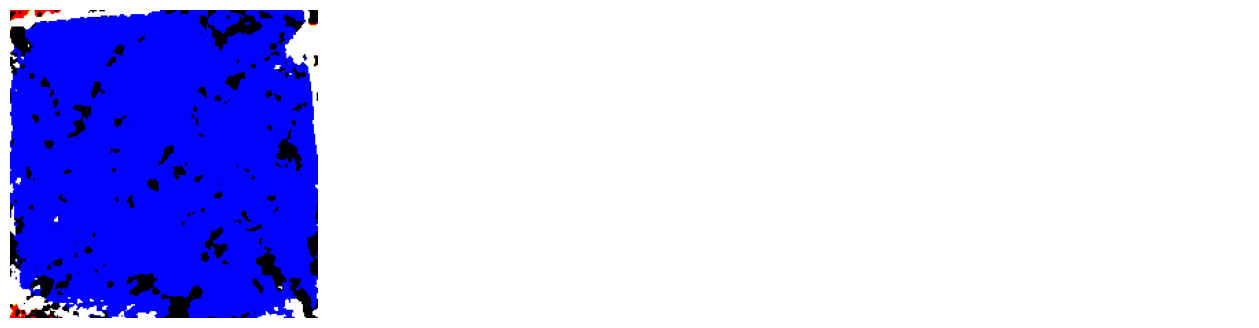

In [38]:
# visualize channel 586 of layer 'mixed4'

obj = objectives.Channel(model, 'conv1_conv', 3)
_ = render.render_vis(obj, 224)

In [62]:
inception_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [58]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
num_classes = 10  # Replace with the number of classes in your dataset

# Remove the existing top layers
inception_model.layers.pop()
inception_model.layers.pop()

# Add new top layers for your classification task
output = inception_model.layers[-1].output
output = Dense(num_classes, activation='softmax')(output)

# Create a new model with your custom top layers
custom_inception_model = Model(inputs=inception_model.input, outputs=output)


In [59]:
custom_inception_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [60]:
custom_inception_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
custom_inception_model_trained = custom_inception_model.fit(train_data, 
                        epochs=1,
                        validation_data=test_data)

ValueError: in user code:

    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, None, None, 10) are incompatible


In [63]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Remove the existing top layers
x = base_model.output
x = Dense(num_classes, activation='softmax')(x)

# Create a new model with your custom top layers
custom_model = Model(inputs=base_model.input, outputs=x)

# Freeze the weights of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

# Train the model
custom_model.fit(train_data,
                 epochs=1,
                 validation_data=test_data)


ValueError: in user code:

    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, None, None, 10) are incompatible
